# Midterm Question 2 Analysis 2

In [2]:
import glob                                   # Lib to open folders and files
import os                                     # Lib to handles System folder location and reading and writing commands
import email                                  # Lib to parse email data and its content
from email.parser import Parser
import csv                                    # Lib to work with CSV
import datetime                               # Lib to work with date in python and its formating
import matplotlib.pyplot as plt               # Lib to plot a graph

In [3]:
file_list = []                                               #List of all users folder name
user_list = []                                               #List to store all users
user_count= []                                               #List for user count (name,inbox count,sent count, deleted count)
file_list = glob.glob('midterm\data\enron\\*')

def userName(filename):                                     #Function to store all usernames
    templist=filename.split('\\',4)
    username=templist[3]
    user_list.append(username)
    return username

def inboxCount(filename):                                  #Function to calculate inbox item count for each user
    inboxCount = 0
    try:
        file = filename+'\inbox'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            inboxCount = len(templist)
        file = filename+'\\notes_inbox'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            inboxCount = inboxCount+len(templist)
    except Exception:
        print("Inbox folder is not present for: "+file) 
    return inboxCount


def sentCount(filename):                                  #Function to calculate sent item count for each user
    sentCount = 0
    try:
        file = filename+'\sent'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            sentCount = len(templist)
        file = filename+'\\_sent_mail'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            sentCount = sentCount+len(templist)
        file = filename+'\\sent_items'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            sentCount = sentCount+len(templist)
    except Exception:
        print("sent folder is not present for: "+file) 
    return sentCount

def deleteCount(filename):                                  #Function to calculate deleted item count for each user
    delCount = 0
    try:
        file = filename+'\\deleted_items'
        if os.path.exists(file):
            templist = glob.glob(file+'\*')
            delCount = len(templist)
    except Exception:
        print("Delete folder is not present for: "+file) 
    return delCount
    
    
for filename in file_list:
    user = userName(filename)
    inboxCnt = inboxCount(filename)
    sentCnt = sentCount(filename)
    delCnt = deleteCount(filename)
    total_count = inboxCnt+sentCnt+delCnt
    user_count.append([user,inboxCnt,sentCnt,delCnt,total_count])
#print(user_count)

file = open('midterm/data/output/usersCount.csv','w',newline='')   # code to write  all datalist into CSV
writer =csv.writer(file)
writer.writerow([ "user","inboxCnt","sentCnt","delCnt","total_count"])
for user in user_count: 
    writer.writerow(user)


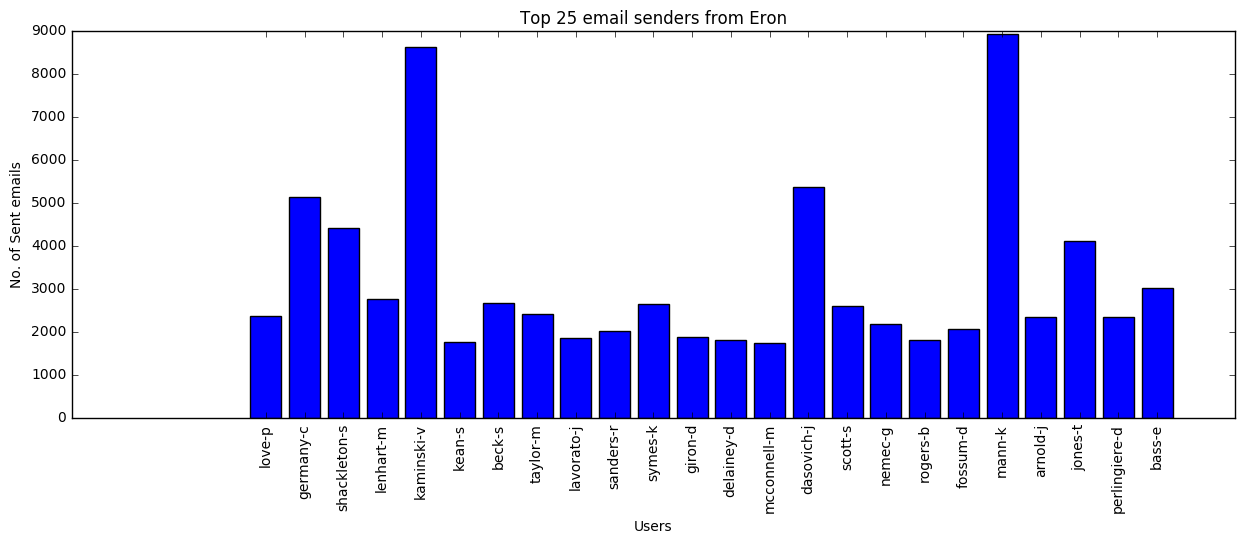

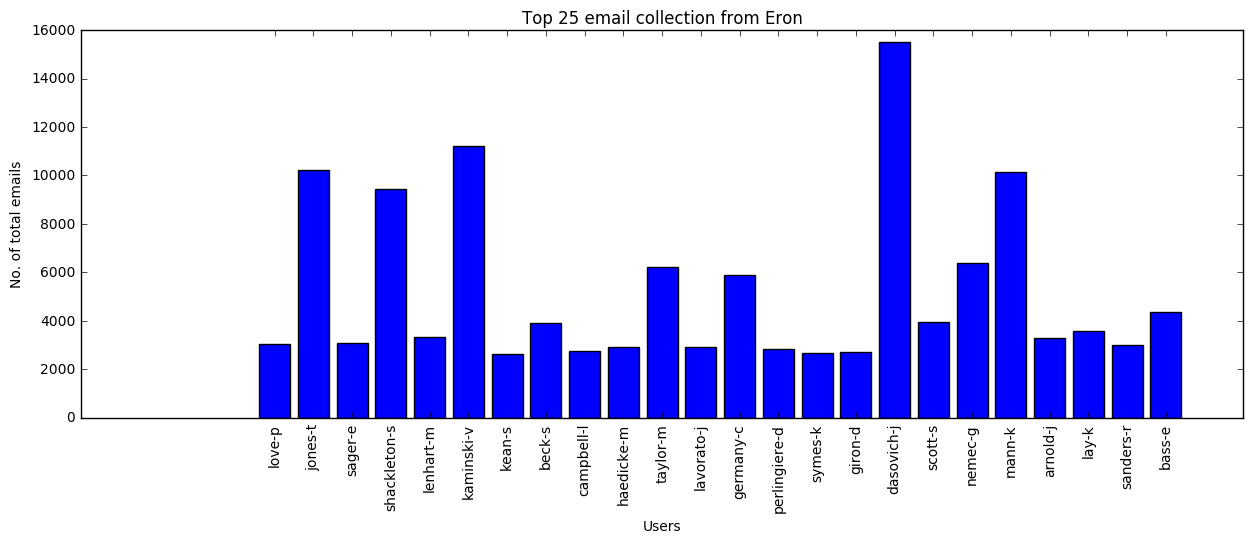

In [4]:
top_sender = sorted(user_count, key=lambda x: x[2], reverse=True)      # Lambda function to get top users in each category
#print(top_sender[:24])
top_deleted = sorted(user_count, key=lambda x: x[3], reverse=True)
top_inbox  =  sorted(user_count, key=lambda x: x[1], reverse=True)
top_all = sorted(user_count, key=lambda x: x[4], reverse=True)
#print('top 25 users who has largest emails in their folders')
#print(top_all[:24])
#print('Top 25 senders are')

temp_dic ={}                                                    #Temp dictionary to store data to plot a graph of sent items
for x in range(len(top_sender[:24])):
    a = top_sender[x][0]
    b = top_sender[x][2]
    temp_dic.update({a:b})
#print(temp_dic)

from pylab import rcParams                                    # Graph to display sent emails and top user stat.                        
rcParams['figure.figsize'] = 15, 5
plt.xlabel("Users")
plt.ylabel("No. of Sent emails")
plt.title('Top 25 email senders from Eron')
plt.bar(range(len(temp_dic)), temp_dic.values(), align='center')
plt.xticks(range(len(temp_dic)), list(temp_dic.keys()),rotation='vertical')
plt.show()


temp_dic1 ={}                                                # Temp dic. to store graph-2 data
for x in range(len(top_all[:24])):
    a = top_all[x][0]
    b = top_all[x][4]
    temp_dic1.update({a:b})

plt.xlabel("Users")                                         #Graph for stat. of all users and its sent/inbox/deleted data
plt.ylabel("No. of total emails")
plt.title('Top 25 email collection from Eron')
plt.bar(range(len(temp_dic1)), temp_dic1.values(), align='center')
plt.xticks(range(len(temp_dic1)), list(temp_dic1.keys()),rotation='vertical')
plt.show()



In [5]:
#probable suspects                                       # A list of suspect which can be investigate more for further analysis
suspects=[]
for x in range(len(top_sender[:24])):
    suspects.append(top_sender[x][0])
for x in range(len(top_deleted[:24])):
    suspects.append(top_deleted[x][0])
for x in range(len(top_all[:24])):
    suspects.append(top_all[x][0])
for x in range(len(top_inbox[:24])):
    suspects.append(top_inbox[x][0])
    
suspects=set(suspects)
print('Below are top suspects who need to me more researched based on their email exchange')
print(suspects)


Below are top suspects who need to me more researched based on their email exchange
{'love-p', 'jones-t', 'shapiro-r', 'meyers-a', 'griffith-j', 'shackleton-s', 'blair-l', 'parks-j', 'hyatt-k', 'dean-c', 'beck-s', 'haedicke-m', 'perlingiere-d', 'giron-d', 'delainey-d', 'steffes-j', 'arnold-j', 'scott-s', 'presto-k', 'schoolcraft-d', 'hain-m', 'mcconnell-m', 'lay-k', 'shankman-j', 'linder-e', 'may-l', 'lewis-a', 'maggi-m', 'solberg-g', 'germany-c', 'sager-e', 'buy-r', 'lenhart-m', 'kaminski-v', 'keavey-p', 'kean-s', 'white-s', 'skilling-j', 'campbell-l', 'taylor-m', 'lavorato-j', 'sanders-r', 'symes-k', 'saibi-e', 'neal-s', 'dasovich-j', 'salisbury-h', 'nemec-g', 'rogers-b', 'fossum-d', 'mann-k', 'thomas-p', 'guzman-m', 'bass-e', 'mims-thurston-p'}


In [12]:
file = open('suspectedUsers.txt','w')   # code to write list into txt file for analysis 3